In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Stanford NLP/Evaluation/final_code_gemini.csv')
df

,Unnamed: 0,final_gemini
0,0,import tensorflow as tf\nfrom sklearn.datasets...
1,1,import torch\nimport torch.nn as nn\nimport to...
2,2,import numpy as np\nfrom sklearn.datasets impo...
3,3,import torch\nfrom datasets import load_datase...
4,4,import tensorflow as tf\nfrom tensorflow.keras...
5,5,import torch\nimport torch.utils.data\nimport ...
6,6,import matplotlib.pyplot as plt\nimport numpy ...
7,7,java\nimport java.io.IOException;\nimport java...


In [20]:
df['final_gemini'][7]

'java\nimport java.io.IOException;\nimport java.util.StringTokenizer;\n\nimport org.apache.hadoop.conf.Configuration;\nimport org.apache.hadoop.fs.Path;\nimport org.apache.hadoop.io.IntWritable;\nimport org.apache.hadoop.io.Text;\nimport org.apache.hadoop.mapreduce.Job;\nimport org.apache.hadoop.mapreduce.Mapper;\nimport org.apache.hadoop.mapreduce.Reducer;\nimport org.apache.hadoop.mapreduce.lib.input.FileInputFormat;\nimport org.apache.hadoop.mapreduce.lib.output.FileOutputFormat;\nimport org.apache.hadoop.util.GenericOptionsParser; // Optional: for standard Hadoop CLI args\n\npublic class WordCount {\n\n    /**\n     * The Mapper class tokenizes the input lines into words and emits (word, 1) pairs.\n     * Input: (LongWritable, Text) where key is byte offset, value is line content.\n     * Output: (Text, IntWritable) where key is a word, value is 1.\n     */\n    public static class TokenizerMapper\n            extends Mapper<Object, Text, Text, IntWritable> {\n\n        private fin

In [5]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_california_housing_linear_model():
    """
    Loads the California Housing dataset, preprocesses it, builds and
    trains a simple linear regression model using TensorFlow Keras.

    Returns:
        tuple: A tuple containing the trained TensorFlow Keras Model
               and the training History object.
    """
    print("Loading California Housing dataset...")
    # 1. Load the dataset
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
    feature_names = housing.feature_names

    print(f"Dataset shape: X={X.shape}, y={y.shape}")
    print(f"Feature names: {feature_names}")

    # 2. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

    # 3. Scale the features
    # Neural networks benefit from feature scaling
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test) # Use transform, not fit_transform, on test data

    print("Building the linear regression model...")
    # 4. Build the simple linear regression model (one Dense layer)
    # This model will have input shape equal to the number of features,
    # and output shape 1 for the regression target.
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Input layer matching number of features
        tf.keras.layers.Dense(units=1, name='linear_output') # Single dense layer with 1 unit for regression
    ])

    # 5. Compile the model
    # Use Mean Squared Error (MSE) as the loss function for regression
    # Use an optimizer like Adam
    # Monitor Mean Absolute Error (MAE) during training
    print("Compiling the model...")
    model.compile(optimizer='adam',
                  loss='mse',       # Mean Squared Error is common for regression
                  metrics=['mae'])  # Mean Absolute Error is also a useful metric

    print("Model Summary:")
    model.summary()

    # 6. Train the model
    print("Training the model...")
    # Train on the scaled training data, validate on the scaled test data
    # Set verbose=1 to see training progress per epoch
    history = model.fit(X_train_scaled, y_train,
                        epochs=5, # Number of training epochs
                        validation_data=(X_test_scaled, y_test),
                        verbose=1)

    print("\nTraining finished.")

    # 7. Evaluate the model on the test data
    print("\nEvaluating the model on the test data...")
    loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Final Test Loss (MSE): {loss:.4f}")
    print(f"Final Test MAE: {mae:.4f}")

    return model, history

# Example usage:
if __name__ == "__main__":
    # This block will run when the script is executed directly
    trained_model, training_history = train_california_housing_linear_model()

    # You can now use the trained_model for predictions
    # Example: Make a prediction on the first few scaled test samples
    # Note: For real prediction, you would need to scale new data using the same scaler
    # print("\nMaking predictions on first 5 test samples:")
    # sample_predictions = trained_model.predict(X_test_scaled[:5])
    # print("Predictions:", sample_predictions.flatten())
    # print("Actual values:", y_test[:5])

    # You can also access training history (e.g., to plot loss curves)
    # print("\nTraining history keys:", training_history.history.keys())

Loading California Housing dataset...
Dataset shape: X=(20640, 8), y=(20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Training data shape: X_train=(16512, 8), y_train=(16512,)
Testing data shape: X_test=(4128, 8), y_test=(4128,)
Scaling features...
Building the linear regression model...
Compiling the model...
Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ linear_output (Dense)           │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.6059 - mae: 2.1139 - val_loss: 3.9566 - val_mae: 1.6276
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.4880 - mae: 1.5087 - val_loss: 2.2479 - val_mae: 1.1861
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0476 - mae: 1.1118 - val_loss: 1.3584 - val_mae: 0.8613
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2539 - mae: 0.8131 - val_loss: 0.8964 - val_mae: 0.6576
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8428 - mae: 0.6261 - val_loss: 0.6831 - val_mae: 0.5660

Training finished.

Evaluating the model on the test data...
Final Test Loss (MSE): 0.6831
Final Test MAE: 0.5660


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Loading and Preprocessing
# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize pixel values to [-1, 1]
])

# Load the CIFAR10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Load the CIFAR10 test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Create a DataLoader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Define the 10 classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Optional: Show some images (helper function from PyTorch tutorial)
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
# dataiter = iter(trainloader)
# images, labels = next(dataiter)
#
# # show images
# imshow(torchvision.utils.make_grid(images[:4]))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


# 2. Model Definition (Convolutional Neural Network)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1) # 3 input channels (RGB), 32 output channels
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Max pooling layer

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 32 input channels, 64 output channels
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # 64 input channels, 128 output channels
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # Output size before flatten: 128 channels, (32/2)/2/2 = 4x4

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512) # Flatten the output of conv layers (128 channels * 4x4 size)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10) # Output layer with 10 classes

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the network
net = Net()

# Check if CUDA is available and move the model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
net.to(device)


# 3. Loss Function and Optimizer
criterion = nn.CrossEntropyLoss() # Loss function suitable for classification
optimizer = optim.Adam(net.parameters(), lr=0.001) # Adam optimizer


# 4. Training Loop
print("Starting training...")
epochs = 1 # Number of training epochs
running_loss_history = [] # To store loss over batches for plotting/tracking
running_correct_history = [] # To store number of correct predictions

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        # Calculate accuracy for the batch
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # Print every 100 batches
        if i % 100 == 99:
            print(f'Epoch [{epoch + 1}/{epochs}], Batch [{i + 1}/{len(trainloader)}], Loss: {running_loss / 100:.3f}')
            running_loss_history.append(running_loss / 100)
            running_correct_history.append(running_correct)
            running_loss = 0.0
            running_correct = 0
            total = 0 # Reset total for this mini-batch accuracy report scope

    print(f'End of Epoch {epoch + 1}, Total Epoch Loss: {running_loss_history[-1] if running_loss_history else "N/A"}') # Print last reported loss

print('Finished Training')

# Optional: Save the trained model
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)


# 5. Evaluation
print("Starting evaluation...")
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad(): # Disable gradient calculation
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

# Optional: Evaluation per class
print("Starting per-class evaluation...")
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {classes[i]:5s} : {100 * class_correct[i] / class_total[i]:.2f} %')

# Optional: Plotting loss (example, requires storing loss history)
# if running_loss_history:
#     plt.figure(figsize=(10, 5))
#     plt.plot(running_loss_history)
#     plt.title("Running Training Loss (per 100 batches)")
#     plt.xlabel("Batch (x100)")
#     plt.ylabel("Loss")
#     plt.show()

100%|██████████| 170M/170M [00:02<00:00, 75.5MB/s]


Using device: cpu
Starting training...
Epoch [1/1], Batch [100/782], Loss: 1.855
Epoch [1/1], Batch [200/782], Loss: 1.536
Epoch [1/1], Batch [300/782], Loss: 1.408
Epoch [1/1], Batch [400/782], Loss: 1.304
Epoch [1/1], Batch [500/782], Loss: 1.213
Epoch [1/1], Batch [600/782], Loss: 1.164
Epoch [1/1], Batch [700/782], Loss: 1.083
End of Epoch 1, Total Epoch Loss: 1.0826445335149766
Finished Training
Starting evaluation...
Accuracy of the network on the 10000 test images: 63.28 %
Starting per-class evaluation...
Accuracy of plane : 76.40 %
Accuracy of car   : 85.70 %
Accuracy of bird  : 52.90 %
Accuracy of cat   : 26.80 %
Accuracy of deer  : 55.40 %
Accuracy of dog   : 49.10 %
Accuracy of frog  : 76.60 %
Accuracy of horse : 65.60 %
Accuracy of ship  : 81.30 %
Accuracy of truck : 63.00 %


In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 1. Generate a random n-class classification problem
# Define parameters for the dataset
n_samples = 1000
n_features = 20
n_informative = 10
n_redundant = 5
n_classes = 3  # Example: 3 classes
random_state = 42

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_classes=n_classes,
    random_state=random_state,
    n_clusters_per_class=2 # Add some complexity
)

print(f"Generated dataset shape: X={X.shape}, y={y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state, stratify=y
)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# 3. Create a pipeline
# The pipeline will first scale the data (compute mean/std on training set)
# and then apply a classifier.
# The scaler computes mean and std on the data it's 'fit' on (the training data)
# and uses those values to transform future data (train or test).
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Scale the features
    ('classifier', LogisticRegression(multi_class='auto', solver='liblinear', random_state=random_state)) # Step 2: Apply a classifier
])

# 4. Train the model: Fit the pipeline using the training dataset
# The .fit() method of the pipeline sequentially fits each step.
# StandardScaler will compute mean and std on X_train and then transform X_train.
# LogisticRegression will then be trained on the scaled X_train and y_train.
print("\nFitting the pipeline on the training data...")
pipeline.fit(X_train, y_train)
print("Pipeline fitting complete.")

# 5. Compute score on the test set
# The .score() method of the pipeline sequentially applies each step's transform
# method (StandardScaler transforms X_test using mean/std from training)
# and then uses the final step's (LogisticRegression) score method.
print("Evaluating the pipeline on the test data...")
score = pipeline.score(X_test, y_test)

print(f"\nTest set accuracy using the pipeline: {score:.4f}")

# You can also get predictions if needed
# y_pred = pipeline.predict(X_test)
# print(f"First 5 predictions: {y_pred[:5]}")
# print(f"First 5 actuals:     {y_test[:5]}")

Generated dataset shape: X=(1000, 20), y=(1000,)
Number of classes: 3
Training data shape: X_train=(750, 20), y_train=(750,)
Testing data shape: X_test=(250, 20), y_test=(250,)

Fitting the pipeline on the training data...
Pipeline fitting complete.
Evaluating the pipeline on the test data...

Test set accuracy using the pipeline: 0.6760


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [13]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.7 MB/s eta 0:00:00


In [14]:
import torch
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
import numpy as np
import evaluate
import os

def train_imdb_sentiment(
    model_name: str = "distilbert/distilbert-base-uncased",
    dataset_name: str = "imdb",
    output_dir: str = "./results_imdb_distilbert",
    num_epochs: int = 1,
    train_batch_size: int = 16,
    eval_batch_size: int = 16,
    learning_rate: float = 2e-5,
    weight_decay: float = 0.01,
    evaluation_strategy: str = "epoch"
):
    """
    Trains a Hugging Face transformer model on the IMDb dataset for binary sentiment classification.

    Args:
        model_name (str): The name of the pre-trained model to use from Hugging Face Hub.
                          Defaults to "distilbert/distilbert-base-uncased".
        dataset_name (str): The name of the dataset to use from Hugging Face Hub.
                            Defaults to "imdb".
        output_dir (str): The directory to save training results and checkpoints.
                          Defaults to "./results_imdb_distilbert".
        num_epochs (int): Number of training epochs. Defaults to 3.
        train_batch_size (int): Batch size per device during training. Defaults to 16.
        eval_batch_size (int): Batch size per device during evaluation. Defaults to 16.
        learning_rate (float): Learning rate for the optimizer. Defaults to 2e-5.
        weight_decay (float): Weight decay for regularization. Defaults to 0.01.
        evaluation_strategy (str): Evaluation strategy ("no", "steps", or "epoch").
                                  Defaults to "epoch".
    """

    print(f"--- Starting training for {model_name} on {dataset_name} ---")
    print(f"Output directory: {output_dir}")

    # 1. Load the dataset
    print(f"Loading dataset: {dataset_name}")
    # IMDb dataset is split into 'train' and 'test'
    try:
        dataset = load_dataset(dataset_name)
        print("Dataset loaded successfully.")
        print(dataset)
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return

    # The IMDb dataset has 'text' and 'label' columns. 'label' is 0 for negative, 1 for positive.
    # This aligns perfectly with binary classification labels.

    # 2. Load the tokenizer and the model
    print(f"Loading tokenizer and model: {model_name}")
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        # AutoModelForSequenceClassification loads the base model with a classification head
        # appropriate for the number of labels specified. IMDb is binary (0 or 1).
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
        print("Tokenizer and model loaded successfully.")
    except Exception as e:
        print(f"Error loading tokenizer or model: {e}")
        return

    # 3. Preprocess the data
    print("Tokenizing the dataset...")

    # Define a function to tokenize the text
    def preprocess_function(examples):
        # Tokenizer will handle padding and truncation automatically based on Trainer/DataCollator
        return tokenizer(examples["text"], truncation=True)

    # Apply the tokenization function to the entire dataset using map
    # batched=True speeds up the process by processing multiple examples at once
    tokenized_dataset = dataset.map(preprocess_function, batched=True)

    # Data collator for dynamic padding
    # This is more memory efficient than padding all sequences to the max length upfront
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    print("Dataset tokenized.")
    print("Sample tokenized example:", tokenized_dataset['train'][0])

    # 4. Define metrics computation
    print("Defining metrics computation...")
    # Using the `evaluate` library is the recommended way with Hugging Face Trainer
    accuracy_metric = evaluate.load("accuracy")

    def compute_metrics(eval_pred):
        """Computes accuracy."""
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return accuracy_metric.compute(predictions=predictions, references=labels)

    print("Metrics function defined (Accuracy).")

    # 5. Define Training Arguments
    print("Defining Training Arguments...")
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    training_args = TrainingArguments(
        output_dir=output_dir,          # Directory to save checkpoints and predictions
        evaluation_strategy=evaluation_strategy, # Evaluate every epoch
        learning_rate=learning_rate,    # Learning rate
        per_device_train_batch_size=train_batch_size, # Batch size per GPU/CPU for training
        per_device_eval_batch_size=eval_batch_size,   # Batch size per GPU/CPU for evaluation
        num_train_epochs=num_epochs,    # Total number of training epochs
        weight_decay=weight_decay,      # Apply weight decay
        logging_dir=f"{output_dir}/logs", # Directory for storing logs
        logging_steps=10,               # Log training state every X update steps
        report_to="none",               # Don't report to external services by default
        load_best_model_at_end=True,    # Load the best model saved during training
        metric_for_best_model="accuracy", # Metric to monitor for best model
        greater_is_better=True,         # Higher accuracy is better
        # push_to_hub=False, # Set to True and add hub_model_id to push model to HF Hub
        # hub_model_id="your-username/your-model-name",
    )
    print("Training Arguments defined.")
    # print(training_args) # Uncomment to see full args

    # 6. Define the Trainer
    print("Defining Trainer...")
    trainer = Trainer(
        model=model,                         # The model to train
        args=training_args,                  # The training arguments
        train_dataset=tokenized_dataset["train"], # The training dataset
        eval_dataset=tokenized_dataset["test"],   # The evaluation dataset
        tokenizer=tokenizer,                 # The tokenizer (needed by the data collator)
        data_collator=data_collator,         # The data collator for dynamic padding
        compute_metrics=compute_metrics      # The function to compute metrics during evaluation
    )
    print("Trainer defined.")

    # 7. Train the model
    print("Starting training...")
    train_result = trainer.train()
    print("Training finished.")

    # 8. Evaluate the model
    # Trainer automatically evaluates during training if evaluation_strategy is set.
    # We can also explicitly evaluate the best model loaded at the end.
    print("Evaluating the best model...")
    eval_results = trainer.evaluate()
    print(f"Evaluation results: {eval_results}")

    # 9. Save the final model and results
    print(f"Saving the model to {output_dir}")
    trainer.save_model(output_dir)
    # Save training metrics
    # with open(os.path.join(output_dir, "train_results.txt"), "w") as writer:
    #     for key, value in train_result.metrics.items():
    #         writer.write(f"{key} = {value}\n")
    # Save evaluation metrics
    with open(os.path.join(output_dir, "eval_results.txt"), "w") as writer:
         for key, value in eval_results.items():
             writer.write(f"{key} = {value}\n")

    print(f"Model and results saved to {output_dir}")
    print("--- Training completed ---")

    return eval_results

# Example usage:
if __name__ == "__main__":
    # Check if CUDA is available and set the device
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    # Train the model
    final_evaluation_results = train_imdb_sentiment(
        model_name="distilbert/distilbert-base-uncased",
        dataset_name="imdb",
        output_dir="./results_imdb_distilbert_example",
        num_epochs=1, # Reduced epochs for quicker example run
        train_batch_size=32, # Increased batch size for potentially faster training if GPU available
        eval_batch_size=32,
        learning_rate=5e-5
    )

    print("\n--- Final Evaluation Results ---")
    print(final_evaluation_results)

    # You can now load the trained model and tokenizer from "./results_imdb_distilbert_example"
    # and use them for inference.
    # from transformers import pipeline
    # classifier = pipeline("sentiment-analysis", model="./results_imdb_distilbert_example", device=0 if device=="cuda" else -1)
    # print(classifier("This movie was fantastic!"))
    # print(classifier("This movie was terrible."))

Using device: cpu
--- Starting training for distilbert/distilbert-base-uncased on imdb ---
Output directory: ./results_imdb_distilbert_example
Loading dataset: imdb


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Error loading dataset: Invalid pattern: '**' can only be an entire path component

--- Final Evaluation Results ---
None


In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Define constants
IMG_ROWS = 28
IMG_COLS = 28
IMG_CHANNELS = 1  # Grayscale images
NUM_CLASSES = 10
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)
BATCH_SIZE = 128
EPOCHS = 1 # Set a relatively high number of epochs to allow early stopping to trigger

# --- 1. Load and Preprocess the Fashion MNIST Dataset ---
print("Loading Fashion MNIST data...")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape data for Conv2D layer (add channel dimension)
x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, IMG_CHANNELS)
x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, IMG_CHANNELS)

# Convert pixel values to float32 and normalize to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# The labels (y_train, y_test) are integers 0-9, which is suitable for
# SparseCategoricalCrossentropy loss, so no one-hot encoding is needed.

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# --- 2. Build the TensorFlow Model ---
print("Building the model...")
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax') # Output layer with 10 units for 10 classes
])

# --- 3. Compile the Model ---
print("Compiling the model...")
model.compile(loss='sparse_categorical_crossentropy', # Use this for integer labels
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# --- 4. Define Callbacks ---
print("Setting up callbacks...")

# Early Stopping: Stop training when validation loss stops improving
# monitor='val_loss': Metric to monitor
# patience=5: Number of epochs with no improvement after which training will be stopped
# restore_best_weights=True: Restores model weights from the epoch with the best monitored value
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1) # verbose=1 to see messages when it triggers

# Model Checkpoint: Save the model periodically or when performance improves
# filepath='best_model.keras': Path to save the model file. Using the new .keras format.
# monitor='val_loss': Metric to monitor for saving
# save_best_only=True: Only save when the monitored metric improves
# mode='min': Save when val_loss is minimum
checkpoint_filepath = 'best_fashion_mnist_model.keras' # Define filename
# Create directory if it doesn't exist (optional, but good practice)
# os.makedirs(os.path.dirname(checkpoint_filepath) or '.', exist_ok=True)

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                   monitor='val_loss',
                                   save_best_only=True,
                                   mode='min',
                                   verbose=1) # verbose=1 to see messages when checkpoint is saved

# Combine callbacks into a list
callbacks_list = [early_stopping, model_checkpoint]

# --- 5. Train the Model with Callbacks ---
print("Starting model training with callbacks...")
# Use validation_split to automatically create validation data from the training set
# or use validation_data=(x_test, y_test) if you prefer using the test set as validation
# (though using the test set during training isn't ideal for final evaluation).
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_split=0.2, # Use 20% of training data for validation
                    callbacks=callbacks_list) # Pass the list of callbacks

print("Training finished.")

# --- 6. Evaluate the Model on the Test Set ---
# Note: If Early Stopping triggered, the model weights are restored to the best epoch.
# If Model Checkpoint saved a better model, we could also load that one.
# Evaluating the 'model' after fit with restore_best_weights=True uses the best weights found.
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- Optional: Load the best model saved by ModelCheckpoint and evaluate ---
# This demonstrates how to load the saved best model
if os.path.exists(checkpoint_filepath):
    print(f"\nLoading the best model saved at: {checkpoint_filepath}")
    loaded_model = tf.keras.models.load_model(checkpoint_filepath)

    print("Evaluating the loaded model on the test set...")
    loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

    print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
    print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

    # Verify that the loaded model produces the same result as the model after fit (with restore_best_weights)
    # They should be very close, if not identical.

Loading Fashion MNIST data...
x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)
Building the model...
Compiling the model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Setting up callbacks...
Starting model training with callbacks...
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7069 - loss: 0.8252
Epoch 1: val_loss improved from inf to 0.41450, saving model to best_fashion_mnist_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.7071 - loss: 0.8245 - val_accuracy: 0.8474 - val_loss: 0.4145
Restoring model weights from the end of the best epoch: 1.
Training finished.

Evaluating the model on the test set...
Test Loss: 0.4295
Test Accuracy: 0.8414

Loading the best model saved at: best_fashion_mnist_model.keras
Evaluating the loaded model on the test set...
Loaded Model Test Loss: 0.4295
Loaded Model Test Accuracy: 0.8414


Iris dataset loaded.
Shape of features (X): (150, 4)
Shape of targets (y): (150,)

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)

Data dimensionality reduced from 4 to 2 using PCA.
Shape of X_train after PCA: (105, 2)
Shape of X_test after PCA: (45, 2)
Explained variance ratio by 2 components: 0.9776

K-Nearest Neighbors classifier with k=5 fitted on the PCA-reduced training data.

Predictions made on the PCA-reduced test data.
Accuracy of the KNN classifier on the test set: 0.9556


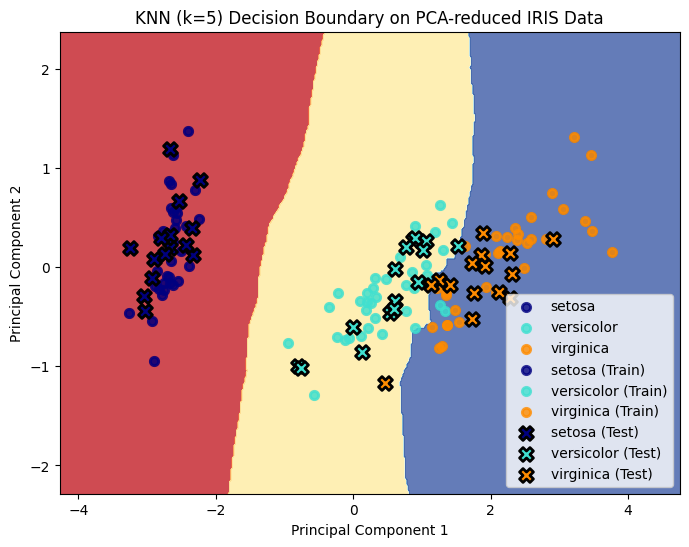

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the dataset
# Load the iris dataset.
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Iris dataset loaded.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of targets (y): {y.shape}")

# 2. Split the data into training and testing sets (optional but good practice)
# Splitting the data into training and testing sets is crucial for evaluating
# the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


# 3. Apply PCA for dimensionality reduction
# Initialize PCA. We'll reduce the dimensionality to 2 components for visualization purposes.
# Fit PCA on the training data.
# Transform both the training and testing data using the fitted PCA.
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the *same* fitted PCA
X_test_pca = pca.transform(X_test)

print(f"\nData dimensionality reduced from {X.shape[1]} to {n_components} using PCA.")
print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")
print(f"Explained variance ratio by {n_components} components: {pca.explained_variance_ratio_.sum():.4f}")


# 4. Fit a k-nearest neighbors classifier
# Initialize the KNN classifier. A common choice for k is 5.
# Fit the classifier using the PCA-transformed training data.
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN model using the PCA-transformed training data and original training labels
knn.fit(X_train_pca, y_train)

print(f"\nK-Nearest Neighbors classifier with k={k} fitted on the PCA-reduced training data.")


# 5. Make predictions and evaluate (optional but completes the process)
# Predict the classes for the PCA-transformed testing data.
# Calculate the accuracy score.
y_pred = knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"\nPredictions made on the PCA-reduced test data.")
print(f"Accuracy of the KNN classifier on the test set: {accuracy:.4f}")


# 6. Optional: Visualize the PCA-reduced data and decision boundary (requires matplotlib)
# Plot the PCA-reduced training data
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

# Plot the training points
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# Create a meshgrid to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=.8)

# Plot the training points again to show their position relative to boundary
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, alpha=.8, lw=lw,
                label=f'{target_name} (Train)')

# Plot the test points as well
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], color=color, marker='X', s=100, alpha=1, lw=lw,
                edgecolor='black', label=f'{target_name} (Test)')


plt.title(f'KNN (k={k}) Decision Boundary on PCA-reduced IRIS Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [ ]:
java
import java.io.IOException;
import java.util.StringTokenizer;

import org.apache.hadoop.conf.Configuration;
import org.apache.hadoop.fs.Path;
import org.apache.hadoop.io.IntWritable;
import org.apache.hadoop.io.Text;
import org.apache.hadoop.mapreduce.Job;
import org.apache.hadoop.mapreduce.Mapper;
import org.apache.hadoop.mapreduce.Reducer;
import org.apache.hadoop.mapreduce.lib.input.FileInputFormat;
import org.apache.hadoop.mapreduce.lib.output.FileOutputFormat;
import org.apache.hadoop.util.GenericOptionsParser; // Optional: for standard Hadoop CLI args

public class WordCount {

    /**
     * The Mapper class tokenizes the input lines into words and emits (word, 1) pairs.
     * Input: (LongWritable, Text) where key is byte offset, value is line content.
     * Output: (Text, IntWritable) where key is a word, value is 1.
     */
    public static class TokenizerMapper
            extends Mapper<Object, Text, Text, IntWritable> {

        private final static IntWritable one = new IntWritable(1);
        private Text word = new Text();

        @Override
        public void map(Object key, Text value, Context context)
                throws IOException, InterruptedException {

            // Get the line as a String
            String line = value.toString();

            // Use StringTokenizer to split the line into tokens (words)
            // We could use regex split, but StringTokenizer is simple for whitespace
            StringTokenizer tokenizer = new StringTokenizer(line);

            // Process each token
            while (tokenizer.hasMoreTokens()) {
                String token = tokenizer.nextToken();

                // Optional: Basic cleaning (convert to lowercase, remove non-alphanumeric)
                // Adjust this based on how you want to define a "word"
                String cleanedToken = token.toLowerCase().replaceAll("[^a-z0-9]", "");

                // Only process if the token is not empty after cleaning
                if (!cleanedToken.isEmpty()) {
                    // Set the Text object to the cleaned word
                    word.set(cleanedToken);

                    // Emit the word and a count of 1
                    context.write(word, one);
                }
            }
        }
    }

    /**
     * The Reducer class sums the counts for each word.
     * Input: (Text, Iterable<IntWritable>) where key is a word, values are the counts (all 1s) for that word.
     * Output: (Text, IntWritable) where key is the word, value is the total count.
     */
    public static class IntSumReducer
            extends Reducer<Text, IntWritable, Text, IntWritable> {

        private IntWritable result = new IntWritable();

        @Override
        public void reduce(Text key, Iterable<IntWritable> values, Context context)
                throws IOException, InterruptedException {

            int sum = 0;
            // Iterate through all IntWritable values for this key (word)
            for (IntWritable val : values) {
                sum += val.get(); // Add the integer value (which is 1) to the sum
            }

            // Set the result IntWritable to the total sum
            result.set(sum);

            // Emit the word (key) and its total count (result)
            context.write(key, result);
        }
    }

    /**
     * Main method to configure and run the MapReduce job.
     */
    public static void main(String[] args) throws Exception {

        // Create a Configuration object for the Hadoop job
        Configuration conf = new Configuration();

        // Optional: Use GenericOptionsParser to handle standard Hadoop command-line options
        // String[] otherArgs = new GenericOptionsParser(conf, args).getRemainingArgs();
        // // Check if input and output paths are provided
        // if (otherArgs.length < 2) {
        //     System.err.println("Usage: wordcount <in> [<in>...] <out>");
        //     System.exit(2);
        // }

        // Basic check for input/output path arguments
        if (args.length != 2) {
             System.err.println("Usage: WordCount <input path> <output path>");
             System.exit(2);
        }


        // Create a Job object instance with a name
        Job job = Job.getInstance(conf, "word count");

        // Set the Jar file to use. Hadoop will find the class based on this.
        job.setJarByClass(WordCount.class);

        // Set the Mapper and Reducer classes
        job.setMapperClass(TokenizerMapper.class);
        job.setReducerClass(IntSumReducer.class);

        // Optional: Set a Combiner class. A Combiner runs locally on the map outputs
        // before they are shuffled to the reducers. Since our reducer logic (summing)
        // is associative and commutative, it can be used as a combiner to reduce data.
        job.setCombinerClass(IntSumReducer.class);

        // Set the output key and value types for the job.
        // These must match the output types of the Reducer.
        job.setOutputKeyClass(Text.class);
        job.setOutputValueClass(IntWritable.class);

        // Set the input path(s).
        // FileInputFormat.addInputPath(job, new Path(otherArgs[0])); // Using GenericOptionsParser
         FileInputFormat.addInputPath(job, new Path(args[0])); // Using basic arg check

        // Set the output path. The output directory must NOT exist beforehand.
        // FileOutputFormat.setOutputPath(job, new Path(otherArgs[otherArgs.length - 1])); // Using GenericOptionsParser
         FileOutputFormat.setOutputPath(job, new Path(args[1])); // Using basic arg check


        // Submit the job and wait for it to complete.
        // System.exit() is used to indicate success (0) or failure (1).
        // job.waitForCompletion(true) returns true if the job completes successfully.
        System.exit(job.waitForCompletion(true) ? 0 : 1);
    }
}